In [1]:
import boto3
import sagemaker
import pandas as pd

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

/opt/conda/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [2]:
!aws s3 cp s3://msads-508-sp25-team6/MSADS\ 508\ Final\ Project.csv .


download: s3://msads-508-sp25-team6/MSADS 508 Final Project.csv to ./MSADS 508 Final Project.csv


In [3]:
!aws s3 ls s3://msads-508-sp25-team6/


                           PRE Data/
2025-03-15 07:04:28 1138005184 MSADS 508 Final Project.csv


In [4]:
df = pd.read_csv("MSADS 508 Final Project.csv")


/tmp/ipykernel_1703/935296992.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("MSADS 508 Final Project.csv")


In [5]:
df.head()


,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Label
0,192.168.4.118,4504,203.73.24.75,80,tcp,3974862.0,29,44,2.965517,1359.340909,ddos
1,192.168.4.118,4504,203.73.24.75,80,tcp,63.0,1,1,0.000000,0.000000,ddos
2,192.168.4.118,4505,203.73.24.75,80,tcp,476078.0,2,6,43.000000,506.166667,ddos
3,192.168.4.118,4505,203.73.24.75,80,tcp,151.0,2,1,0.000000,0.000000,ddos
4,192.168.4.118,4506,203.73.24.75,80,tcp,472507.0,2,5,36.500000,210.000000,ddos


In [6]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display summary statistics
summary_stats = df.describe()

# Display results
missing_values, summary_stats


(Source IP                 0
 Source Port               0
 Destination IP            0
 Destination Port          0
 Protocol                  0
 Flow Duration             0
 Total Fwd Packets         0
 Total Backward Packets    0
 Fwd Packet Length Mean    0
 Bwd Packet Length Mean    0
 Label                     0
 dtype: int64,
        Flow Duration  Total Fwd Packets  Total Backward Packets  \
 count   1.556042e+07       1.556042e+07            1.556042e+07   
 mean    6.994334e+06       2.786705e+01            1.113106e+01   
 std     2.301101e+07       1.560498e+03            2.331984e+02   
 min    -1.000000e+00       0.000000e+00            0.000000e+00   
 25%     3.840000e+02       1.000000e+00            1.000000e+00   
 50%     1.216100e+04       2.000000e+00            2.000000e+00   
 75%     2.335781e+06       4.000000e+00            5.000000e+00   
 max     1.200000e+08       3.096280e+05            2.919230e+05   
 
        Fwd Packet Length Mean  Bwd Packet Length Me

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

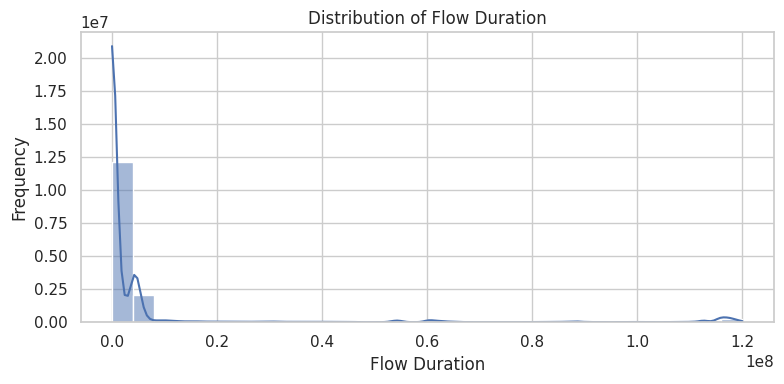

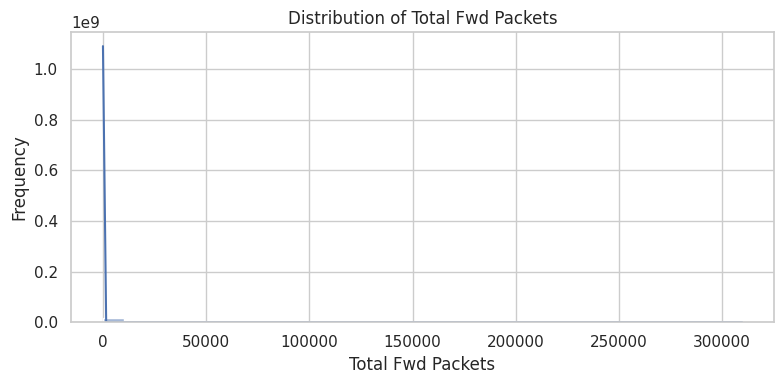

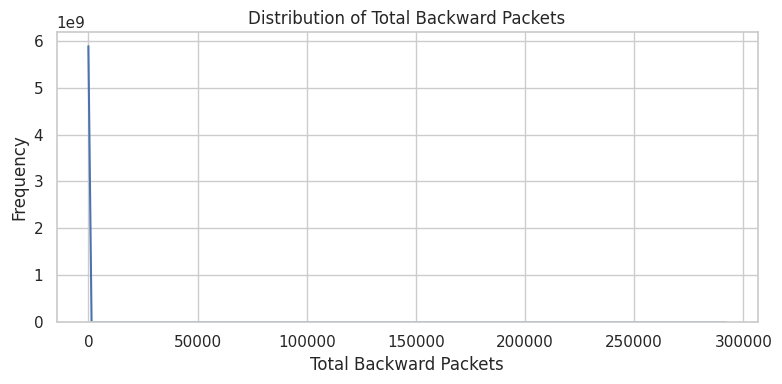

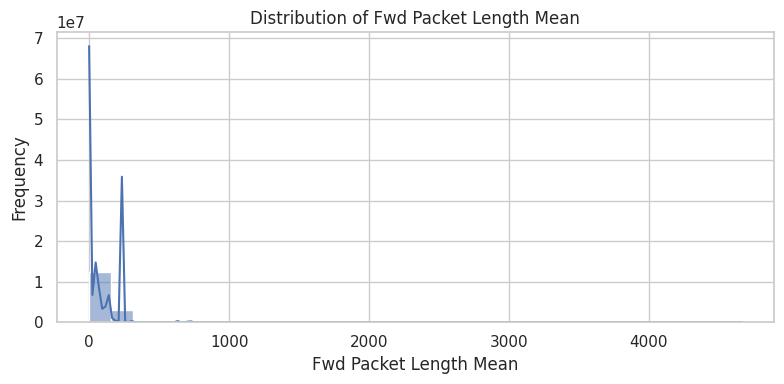

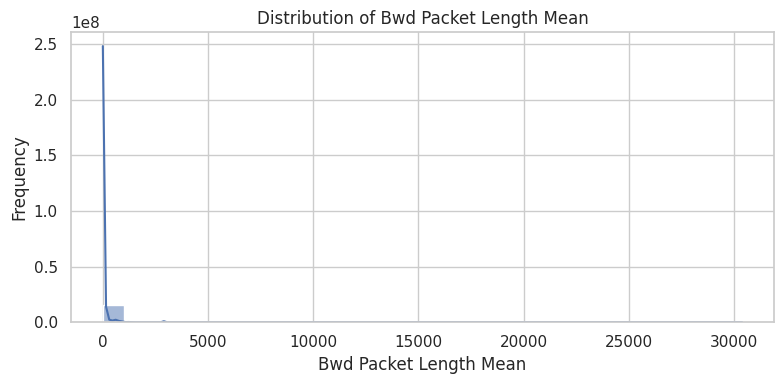

In [8]:
# Set plot styles
sns.set(style="whitegrid")

# Plot 1: Distribution of numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


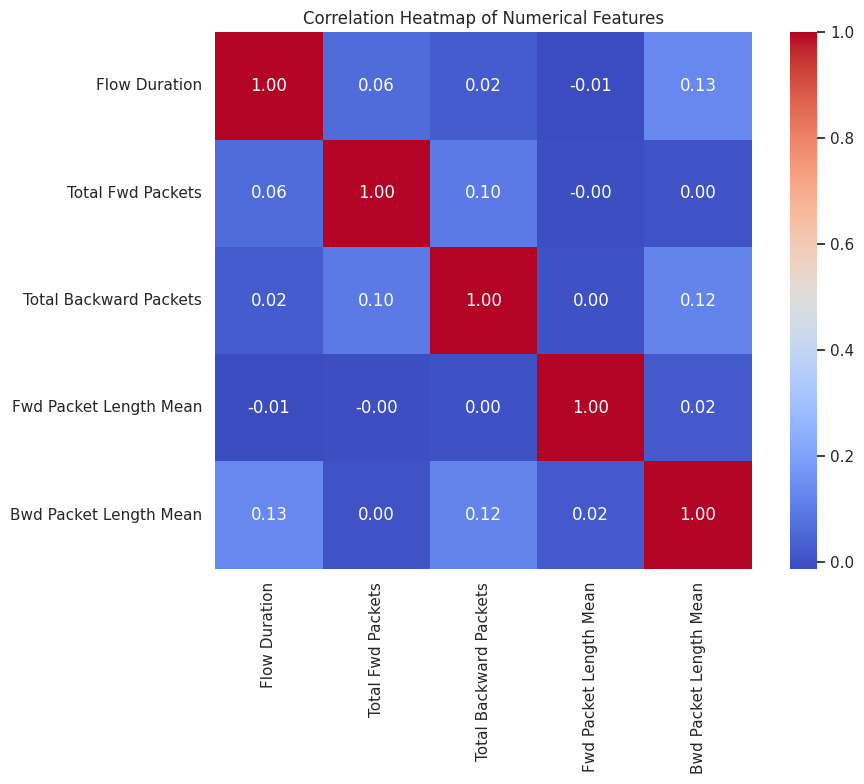

In [9]:
# Plot 2: Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

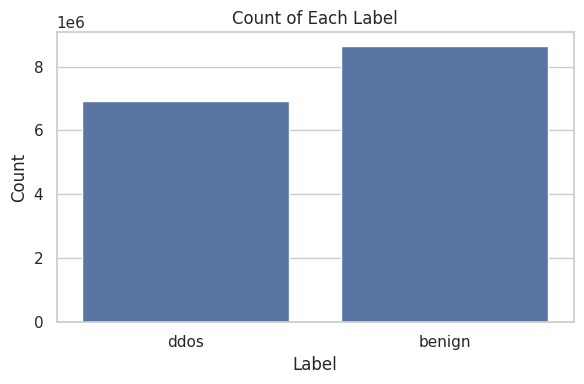

In [10]:
# Plot 3: Count plot for 'Label'
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title('Count of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

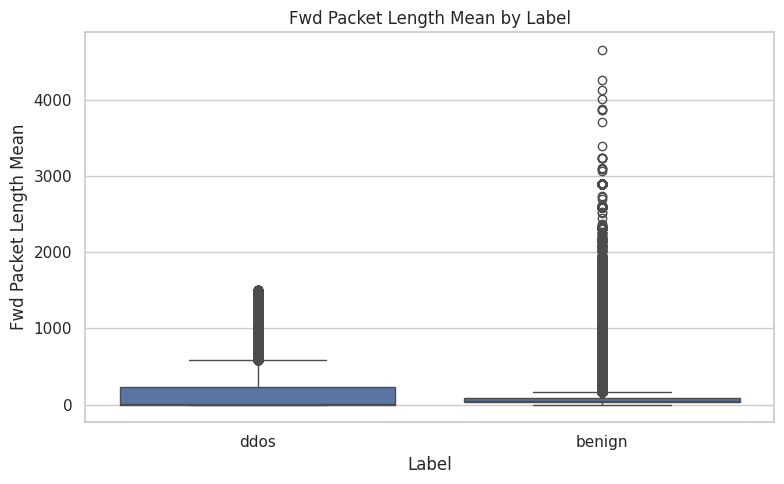

In [11]:
# Plot 4: Boxplot of packet lengths by label
plt.figure(figsize=(8, 5))
sns.boxplot(x='Label', y='Fwd Packet Length Mean', data=df)
plt.title('Fwd Packet Length Mean by Label')
plt.tight_layout()
plt.show()

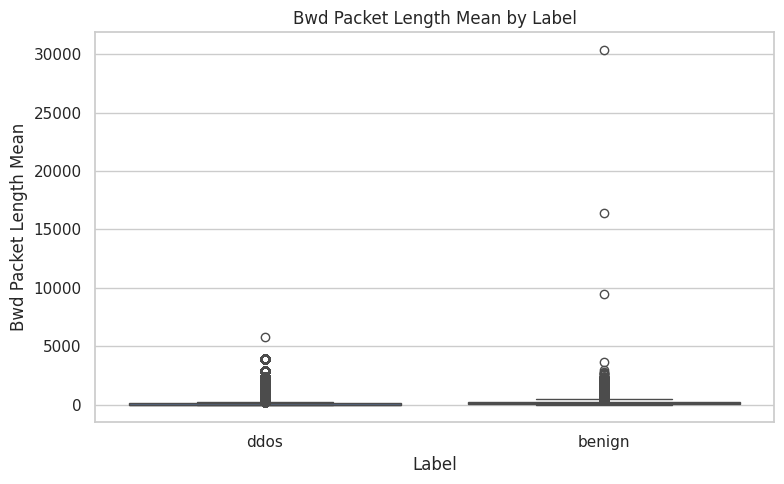

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Label', y='Bwd Packet Length Mean', data=df)
plt.title('Bwd Packet Length Mean by Label')
plt.tight_layout()
plt.show()


In [13]:
# Display column names to identify discrepancies
df.columns

Index(['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
       'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packet Length Mean',
       'Bwd Packet Length Mean', 'Label'],
      dtype='object')

In [14]:
# Adjust the list of essential features based on the available columns
available_features = [
    'Flow Duration', 'Source Port', 'Destination Port', 'Protocol',
    'Total Fwd Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
    'Label'  # Keeping the target column
]

# Ensure only the required columns are retained
df_cleaned = df[available_features].copy()

# Display the cleaned dataset using print instead of a tool function
print("Cleaned Dataset:")
print(df_cleaned.head())


Cleaned Dataset:
   Flow Duration Source Port Destination Port Protocol  Total Fwd Packets  \
0      3974862.0        4504               80      tcp                 29   
1           63.0        4504               80      tcp                  1   
2       476078.0        4505               80      tcp                  2   
3          151.0        4505               80      tcp                  2   
4       472507.0        4506               80      tcp                  2   

   Fwd Packet Length Mean  Bwd Packet Length Mean Label  
0                2.965517             1359.340909  ddos  
1                0.000000                0.000000  ddos  
2               43.000000              506.166667  ddos  
3                0.000000                0.000000  ddos  
4               36.500000              210.000000  ddos  


In [15]:
# Define num_cols (Numeric Columns Only)
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Step 1: Remove Duplicates (Only for Numeric Columns)
df_cleaned = df_cleaned.drop_duplicates(subset=num_cols)


In [16]:
print("Dropped duplicate rows based on numeric columns.")

Dropped duplicate rows based on numeric columns.


In [17]:
# Handle missing values (column-wise to prevent shape errors)
for col in num_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())


In [18]:
# Remove highly correlated features (> 0.95) - Only for numeric columns
df_numeric = df_cleaned[num_cols]  # Ensure it's numeric only
cor_matrix = df_numeric.corr().abs()
upper_tri = np.triu(np.ones(cor_matrix.shape), k=1)

# Identify columns to drop based on correlation threshold
to_drop = [col for col in cor_matrix.columns if (cor_matrix[col].values * upper_tri).max() > 0.95]

In [19]:
# **Fix:** Ensure that columns exist before dropping
essential_features = ['Flow Duration', 'Source Port', 'Destination Port', 'Protocol',
                      'Total Fwd Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean'
                     ]

to_drop = [col for col in to_drop if col in df_cleaned.columns and col not in essential_features]

df_cleaned.drop(columns=to_drop, inplace=True, errors='ignore')  # Ignore missing columns safely
print("Dropped correlated features:", to_drop)

Dropped correlated features: []


In [20]:
# Display Final Data
print("Cleaned Network Traffic Data:")
print(df_cleaned.head())

Cleaned Network Traffic Data:
   Flow Duration Source Port Destination Port Protocol  Total Fwd Packets  \
0      3974862.0        4504               80      tcp                 29   
1           63.0        4504               80      tcp                  1   
2       476078.0        4505               80      tcp                  2   
3          151.0        4505               80      tcp                  2   
4       472507.0        4506               80      tcp                  2   

   Fwd Packet Length Mean  Bwd Packet Length Mean Label  
0                2.965517             1359.340909  ddos  
1                0.000000                0.000000  ddos  
2               43.000000              506.166667  ddos  
3                0.000000                0.000000  ddos  
4               36.500000              210.000000  ddos  


In [21]:
print("Available columns in df_cleaned:", df_cleaned.columns)


Available columns in df_cleaned: Index(['Flow Duration', 'Source Port', 'Destination Port', 'Protocol',
       'Total Fwd Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
       'Label'],
      dtype='object')


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Ensure df_cleaned is the correct dataset
df_encoded = df_cleaned.copy()

# Step 1: Encode categorical variables (Label and Protocol)
label_encoder = LabelEncoder()
df_encoded["Protocol"] = label_encoder.fit_transform(df_encoded["Protocol"])
df_encoded["Label"] = label_encoder.fit_transform(df_encoded["Label"])

# Step 2: Convert all columns to numeric safely
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Step 3: Drop rows with NaN values (from encoding or invalid data)
df_encoded = df_encoded.dropna()

# Step 4: Standardize features (excluding Label)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop(columns=["Label"]))
y = df_encoded["Label"].astype(int)  # Ensure Label is integer

# Step 5: Convert back to DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=df_encoded.drop(columns=["Label"]).columns)
df_scaled["Label"] = y

print("Successfully cleaned, encoded, and scaled data!")
print(df_scaled.head())


Successfully cleaned, encoded, and scaled data!
   Flow Duration  Source Port  Destination Port  Protocol  Total Fwd Packets  \
0      -0.282271    -1.141231          -0.74716  0.009922          -0.009472   
1      -0.418600    -1.141231          -0.74716  0.009922          -0.022637   
2      -0.402273    -1.141192          -0.74716  0.009922          -0.022167   
3      -0.418597    -1.141192          -0.74716  0.009922          -0.022167   
4      -0.402396    -1.141153          -0.74716  0.009922          -0.022167   

   Fwd Packet Length Mean  Bwd Packet Length Mean  Label  
0               -0.835627                3.623101    1.0  
1               -0.856321               -0.656087    1.0  
2               -0.556262                0.937319    1.0  
3               -0.856321               -0.656087    1.0  
4               -0.601619                0.004991    1.0  


In [23]:
# Check for missing values in the Label column
df_scaled["Label"].isnull().sum()

3897081

In [24]:
# Check for NaN and NA values in df_scaled

nan_summary = df_scaled.isna().sum()  # Count NaN values per column
na_summary = df_scaled.isnull().sum()  # Count NA values per column

# Display only columns that have missing values
missing_data = pd.DataFrame({
    "NaN Count": nan_summary[nan_summary > 0],
    "NA Count": na_summary[na_summary > 0]
})


In [25]:
!pip install imbalanced-learn
